# 1. Set-Up Packages

Note that there are many dependecy issues with these packages, if it is not working you can try:
* restarting your session
* running in a new notebook

In [ ]:
!pip3 install -q tf_keras
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'
!pip3 install -q ktrain tensorflow keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 85.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 53.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 38.0 MB/s eta 0:00:00


In [ ]:
from ktrain.text import SimpleQA # import ktrain module

In [ ]:
!pip3 install -q keybert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.5 MB/s eta 0:00:00


In [ ]:
# ─── 0. INSTALL DEPENDENCIES (run once) ───────────────────────────
!pip install -q clean-text nltk openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.1 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# 2. Read in Data

In [ ]:
# prompt: read in the excel and read the column content into a list

import pandas as pd

# install openpyxl if you haven't already
#!pip install openpyxl

def read_excel_column_to_list(filepath, column_name):
    try:
        df = pd.read_excel(filepath, engine='openpyxl')
        if column_name not in df.columns:
            print(f"Error: Column '{column_name}' not found in the Excel file.")
            return None

        text_list = df[column_name].tolist()
        return text_list
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:
filepath = 'RAW_all_comms.xlsx'
column_name = 'cleaned_content'  # column where text is stored
cbam_data = read_excel_column_to_list(filepath, column_name)

if cbam_data:
    print(cbam_data[:5]) # Print first 5 elements of the list


["Civil society organizations express concerns about the agreement reached in COREPER II on a Carbon Border Adjustment Mechanism (CBAM) compromise text that does not address important issues linked to the EU Emission Trading System (ETS) Directive and other key aspects of the Fit for 55 package. Together with other NGOs, we support a fair and effective CBAM, designed and implemented as an alternative to current EU ETS carbon leakage measures such as free allowances and indirect cost compensation. We believe that agreeing on a CBAM separately from the EU ETS Directive would be detrimental to its implementation, and risk undermining the level of ambition and decarbonization incentives of the Fit for 55 package European Environmental Bureau Rue des Deux Eglises 14-16, B-1000 Brussels Tel: +32 2 289 10 90 E-mail: If you have a complaint, please study our complaints policy and contact us at . EC register for interest representatives: Identification number <PHONE> International non-profit as

In [ ]:
# clean text of /n, tabs, exta spaces etc
def clean_text_list(text_list):
    cleaned = []
    for t in text_list:
        if pd.notnull(t):
            text = str(t)
            text = text.replace('\n', ' ')          # Remove newlines
            text = text.replace('\t', ' ')          # Remove tabs
            text = ' '.join(text.split())           # Remove extra spaces
            cleaned.append(text)
    return cleaned

cbam_data = clean_text_list(cbam_data)
print(cbam_data[:5])

["Civil society organizations express concerns about the agreement reached in COREPER II on a Carbon Border Adjustment Mechanism (CBAM) compromise text that does not address important issues linked to the EU Emission Trading System (ETS) Directive and other key aspects of the Fit for 55 package. Together with other NGOs, we support a fair and effective CBAM, designed and implemented as an alternative to current EU ETS carbon leakage measures such as free allowances and indirect cost compensation. We believe that agreeing on a CBAM separately from the EU ETS Directive would be detrimental to its implementation, and risk undermining the level of ambition and decarbonization incentives of the Fit for 55 package European Environmental Bureau Rue des Deux Eglises 14-16, B-1000 Brussels Tel: +32 2 289 10 90 E-mail: If you have a complaint, please study our complaints policy and contact us at . EC register for interest representatives: Identification number <PHONE> International non-profit as

# 3. Initialize QA Model

In [ ]:
INDEXDIR = '/tmp/cbamtesting_docs' # set up index dir (might need to rename if running agin)
SimpleQA.initialize_index(INDEXDIR)

FileIndex(FileStorage('/tmp/cbamtesting_docs'), 'MAIN')

In [ ]:
# RUNNING FULL DOCUMENT LEVEL
# Convert each element of cbam_data to string before indexing
#cbam_data = [str(item) for item in cbam_data]

SimpleQA.index_from_list(cbam_data, INDEXDIR, commit_every=len(cbam_data),
                              multisegment=True, procs=4, # these args speed up indexing
                               breakup_docs=True          # this slows indexing but speeds up answer retrieval
                              )

# 4. DEPTH 1: Original Levers

These original levers were dervied from LDA topic modelling which was carried out on the cbam_data corpus.

## 4.1 Run QA Model

In [ ]:
qa = SimpleQA(INDEXDIR)

increase_answer_list = []
effects_answer_list = []
decrease_answer_list = []

# LDA TOPICS FROM THE EU COMMUNICATIONS
eu_cbam_objectives = ["industrial decarbonisation",
                   "industrial decarbonization",
                   "climate regulation",
                   "sustainable regulation", # proxy for climate regulation
                   "green regulation",       # proxy for climate regulation
                   "carbon borders",
                   "carbon reporting",
                   "climate finance",
                   "green transition",
                   "digitalization",
                   "digitalisation",
                   "emissions trading scheme"]

# LDA TOPICS FROM STAKEHOLDER COMMUNICATIONS
stakeholder_cbam_objectives = ["sustainability reporting",
                   "supply chain sustainability",
                   "carbon accounting",
                   "climate governance",
                   "green finance",
                   "carbon prices",
                   "the circular economy",
                   "circularity",
                   "decarbonization",
                   "international trade",
                   "green steel",
                   "low carbon cement",
                   "green technology",
                   "low carbon infrastructure",
                   "protection against carbon leakage"]

all_cbam_objectives = eu_cbam_objectives + stakeholder_cbam_objectives

counter = 0
for k in all_cbam_objectives:
    print(k)
    try:
        increase_answer_list.append( {
            'cause': qa.ask('What causes ' + k + ' to increase?'),
            'effect': k
        })

        increase_answer_list.append( {
            'cause': qa.ask('What improves ' + k + '?'),
            'effect': k
        })
        decrease_answer_list.append( {
            'cause': qa.ask('What causes ' + k + ' to decrease?'),
            'effect': k
        })

        decrease_answer_list.append( {
            'cause': qa.ask('What adversely affects ' + k + '?'),
            'effect': k
        })

        effects_answer_list.append( {
            'cause': qa.ask('What effects ' + k + '?'), # changed from what effects
            'effect': k
        })

        effects_answer_list.append( {
            'cause': qa.ask('What affects ' + k + '?'), # changed from what affects
            'effect': k
        })

    except Exception as e:
        print("ERR: ")
        print(e)
    #if counter > 3:
    #    break
    counter = counter + 1

#for i in increase_answer_list:
#    #weight = set_weight(qa.ask('How much does ' + i.cause + ' cause ' + i.effect + ' to decrease?'))
#    #fcm.setWeight(i.cause, i.effect, weight)
#    print(i['cause'], i['effect']) #, weight)

## 4.2 Save Depth 1 Results

In [ ]:
import pandas as pd

# After the QA loop:
df_increase = pd.DataFrame(increase_answer_list)
df_effects = pd.DataFrame(effects_answer_list)
df_decrease = pd.DataFrame(decrease_answer_list)

df_increase.to_csv('stakeholder_depth1_increase_answers.csv', index=False)
df_effects.to_csv('stakeholder_depth1_effects_answers.csv', index=False)
df_decrease.to_csv('stakeholder_depth1_decrease_answers.csv', index=False)

from google.colab import files

# Download files locally
files.download('stakeholder_depth1_increase_answers.csv')
files.download('stakeholder_depth1_effects_answers.csv')
files.download('stakeholder_depth1_decrease_answers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4.3 Sanity Check Answers

In [ ]:
print("------------------------------------------------------------")
print("Increase answer list")
print("------------------------------------------------------------")
for i in increase_answer_list:
    print("***** effect: " + i["effect"])
    for c in i["cause"]:
        print("answer: " + c["answer"])
        print("confidence: " + str(c["confidence"]))
        print("similarity_score: " + str(c["similarity_score"]))
        print("reference: " + c["reference"])
        print("sentence_beginning: " + c["sentence_beginning"])
        print("sentence_end: " + c["sentence_end"])
        print("full_answer: " + c["full_answer"])
        print("-------------")
#print(increase_answer_list)
print("------------------------------------------------------------")
print("Decrease answer list")
print("------------------------------------------------------------")
#print(decrease_answer_list)
for i in decrease_answer_list:
    print("***** effect: " + i["effect"])
    for c in i["cause"]:
        print("answer: " + c["answer"])
        print("confidence: " + str(c["confidence"]))
        print("similarity_score: " + str(c["similarity_score"]))
        print("reference: " + c["reference"])
        print("sentence_beginning: " + c["sentence_beginning"])
        print("sentence_end: " + c["sentence_end"])
        print("full_answer: " + c["full_answer"])
        print("-------------")

print("------------------------------------------------------------")
print("Effects answer list")
print("------------------------------------------------------------")
#print(effects_answer_list)
for i in effects_answer_list:
    print("***** effect: " + i["effect"])
    for c in i["cause"]:
        print("answer: " + c["answer"])
        print("confidence: " + str(c["confidence"]))
        print("similarity_score: " + str(c["similarity_score"]))
        print("reference: " + c["reference"])
        print("sentence_beginning: " + c["sentence_beginning"])
        print("sentence_end: " + c["sentence_end"])
        print("full_answer: " + c["full_answer"])
        print("-------------")

------------------------------------------------------------
Increase answer list
------------------------------------------------------------
***** effect: industrial decarbonisation
answer: finally upholding the ' polluter pays principle
confidence: 0.59972936
similarity_score: 0.7764610052108765
reference: 167
sentence_beginning:  for the cbam to act as a real alternative to carbon leakage protection measures, and push eu industry to decarbonise, co legislators will have to agree on 
sentence_end:  ' by phasing out half of free permits to pollute for cbam sectors by 2030, and totally by 2032.
full_answer: for the cbam to act as a real alternative to carbon leakage protection measures, and push eu industry to decarbonise, co legislators will have to agree on finally upholding the ' polluter pays principle ' by phasing out half of free permits to pollute for cbam sectors by 2030, and totally by 2032.
-------------
answer: a strong economy
confidence: 0.34917808
similarity_score: 0.767

## 4.4 Create Cause-effect dataframe

### 4.4.1 Single Run

If the able to run QA model without crashing or runtime restarting, can run this code directly. Otherwise, read in the model outputs from csv and create the cause-effect dataframe based on that (code available at 4.4.2).

In [ ]:
from operator import itemgetter
from keybert import KeyBERT
from operator import itemgetter
import pandas as pd

# IF GOING DIRECTLY FROM THE MODEL OUTPUT
def build_cause_effect_df(df_cause_effect, answer_list, effect_type):
    for i in answer_list:
        for c in i["cause"]:

            keywords = kw_model.extract_keywords(c["answer"], keyphrase_ngram_range=(1, 1),
                                                 stop_words='english',
                                                 top_n=5,
                                                 use_mmr=True,
                                                 diversity=0.7)
            keywords_bigrams = kw_model.extract_keywords(c["answer"], keyphrase_ngram_range=(1, 2),
                                                         stop_words='english',
                                                         top_n=5,
                                                         use_mmr=True,
                                                         diversity=0.7)
            keywords_trigrams = kw_model.extract_keywords(c["answer"], keyphrase_ngram_range=(1, 3),
                                                          stop_words='english',
                                                          top_n=5,
                                                          use_mmr=True,
                                                          diversity=0.7)

            all_keywords = []
            if keywords:
                all_keywords += keywords
            if keywords_bigrams:
                all_keywords += keywords_bigrams
            if keywords_trigrams:
                all_keywords += keywords_trigrams

            # manually assign the weights
            weight = 0
            if effect_type == "increase":
                weight = 1
            elif effect_type == "decrease":
                weight = -1
            else:
                weight = 0.5


            top_k = c["answer"]
            top_k_val = 0
            if(len(all_keywords) > 0):
                top_k = max(all_keywords, key = itemgetter(1))[0]
                top_k_val = max(all_keywords, key = itemgetter(1))[1]

            #print("Cause: " + top_k + ", Effect: " + i["effect"] + ", Original : " + c["answer"] + ", Confidence: " + str(c["confidence"]) + ", k_num: " + str(top_k_val))
            #print("------------------------------")
            # add to dataframe if confidence is over 0.1
            #if c["confidence"] > .1:
               #df_cause_effect.loc[len(df_cause_effect.index)] = [top_k, i["effect"], effect_type, c["confidence"], top_k_val, all_keywords, c["similarity_score"], weight, c["full_answer"]]

            # add all answers to df (regardless of confidence)
            df_cause_effect.loc[len(df_cause_effect.index)] = [top_k, i["effect"], effect_type, c["confidence"], top_k_val, all_keywords, c["similarity_score"], weight, c["full_answer"]]

    return df_cause_effect

In [ ]:
# intialize the cause_effect dataframe and keyword model
df_cause_effect = pd.DataFrame(columns=['cause', 'effect', 'effect_type', 'confidence', 'top_keyword_score', 'keywords', 'similarity_score', 'weight', 'full_answer'])
kw_model = KeyBERT()

effect_type = ""

# populate cause effect dataframe
df_cause_effect = build_cause_effect_df(df_cause_effect, increase_answer_list, "increase")
df_cause_effect = build_cause_effect_df(df_cause_effect, decrease_answer_list, "decrease")
df_cause_effect = build_cause_effect_df(df_cause_effect, effects_answer_list, "effect")

### 4.4.2 Cause-effect df from CSV

First, read in the QA model answer lists from CSV.
Second, define function to create cause-effect dataframe.
Third, populate cause-effect dataframe with data from CSV answer lists.

In [ ]:
# prompt:  re-read in decrease, increase, effect answer lists (if model output already saved)

import pandas as pd
from google.colab import files

# Load the CSV files into pandas DataFrames
try:
    df_increase = pd.read_csv('stakeholder_depth1_increase_answers.csv')
    df_decrease = pd.read_csv('stakeholder_depth1_decrease_answers.csv')
    df_effects = pd.read_csv('stakeholder_depth1_effects_answers.csv')
    print("Files loaded successfully.")
except FileNotFoundError:
    print("Error: One or more CSV files not found. Please ensure they are in the current directory or provide the correct paths.")
    # Handle the error appropriately, e.g., exit the script or try alternative loading methods
    exit()

print("\nIncrease DataFrame:")
print(df_increase.head())

print("\nDecrease DataFrame:")
print(df_decrease.head())

print("\nEffects DataFrame:")
print(df_effects.head())

Files loaded successfully.

Increase DataFrame:
                                               cause  \
0  [{'answer': 'increasing international climate ...   
1  [{'answer': 'renewable based electrification',...   
2  [{'answer': 'to low carbon prices and free all...   
3  [{'answer': 'renewable based electrification',...   
4  [{'answer': 'the global average temperature ri...   

                       effect  
0  industrial decarbonization  
1  industrial decarbonization  
2  industrial decarbonisation  
3  industrial decarbonisation  
4    environmental regulation  

Decrease DataFrame:
                                               cause  \
0  [{'answer': 'to a crease in industrial activit...   
1  [{'answer': 'affects european competition', 'c...   
2  [{'answer': 'to a crease in industrial activit...   
3  [{'answer': 'affects european competition', 'c...   
4  [{'answer': 'excessive regulation and high ene...   

                       effect  
0  industrial decarbonization  
1

In [ ]:
import pandas as pd
import numpy as np
from keybert import KeyBERT
from operator import itemgetter

# Initialize KeyBERT
kw_model = KeyBERT()

# Initialize the cause_effect dataframe
df_cause_effect = pd.DataFrame(columns=['cause', 'effect', 'effect_type', 'confidence', 'top_keyword_score', 'keywords', 'similarity_score', 'weight', 'full_answer'])


def build_cause_effect_df_from_df(df_cause_effect, df_input, effect_type):
    """
    Builds the cause_effect DataFrame from the input DataFrame.

    Args:
        df_cause_effect: The DataFrame to store cause-effect relationships.
        df_input: The input DataFrame containing 'cause' and 'effect' columns.
        effect_type: The type of effect ("increase", "decrease", "effect").

    Returns:
        The updated df_cause_effect DataFrame.
    """
    for index, row in df_input.iterrows():
        # Convert 'cause' column to a list; handle empty or non-list values
        try:
            cause_data_list = eval(row['cause'])
            # Ensure cause_data_list is a list and not empty before accessing elements
            if isinstance(cause_data_list, list) and cause_data_list:
                cause_data = cause_data_list[0]
            else:
                # Handle cases where 'cause' is empty or not a list
                print(f"Skipping row {index} in {df_input} due to invalid 'cause' data: {row['cause']}")
                continue
        except (SyntaxError, NameError) as e:
            # Handle cases where eval fails (e.g., invalid string format)
            print(f"Skipping row {index} due to eval error: {e}, cause data: {row['cause']}")
            continue

        # Extract keywords using KeyBERT
        keywords = kw_model.extract_keywords(cause_data["answer"], keyphrase_ngram_range=(1, 1), stop_words='english', top_n=5, use_mmr=True, diversity=0.7)
        keywords_bigrams = kw_model.extract_keywords(cause_data["answer"], keyphrase_ngram_range=(1, 2), stop_words='english', top_n=5, use_mmr=True, diversity=0.7)
        keywords_trigrams = kw_model.extract_keywords(cause_data["answer"], keyphrase_ngram_range=(1, 3), stop_words='english', top_n=5, use_mmr=True, diversity=0.7)

        all_keywords = keywords + keywords_bigrams + keywords_trigrams

        # Assign weight based on effect_type
        weight = 1 if effect_type == "increase" else -1 if effect_type == "decrease" else 0.5

        # Select top keyword and its score
        top_k = cause_data["answer"]
        top_k_val = 0
        if all_keywords:
            top_k = max(all_keywords, key=itemgetter(1))[0]
            top_k_val = max(all_keywords, key=itemgetter(1))[1]

        # Get similarity_score (or assign 0 if not available)
        similarity_score = cause_data.get("similarity_score", 0)

        # Append to DataFrame if confidence is above threshold
        if cause_data["confidence"] > .1:
            df_cause_effect.loc[len(df_cause_effect.index)] = [top_k, row['effect'], effect_type, cause_data["confidence"], top_k_val, all_keywords, similarity_score, weight, cause_data["answer"]]

    return df_cause_effect

In [ ]:
# Populate the DataFrame
df_cause_effect = build_cause_effect_df_from_df(df_cause_effect, df_increase, "increase")
df_cause_effect = build_cause_effect_df_from_df(df_cause_effect, df_decrease, "decrease")
df_cause_effect = build_cause_effect_df_from_df(df_cause_effect, df_effects, "effect")

In [ ]:
# explore dataframe
print(df_cause_effect.info())
df_cause_effect.head(30)

### 4.4.3 Save cause-effect dataframe

In [ ]:
df_cause_effect.to_csv('stakeholder_depth1_cause_effect.csv', index=False)

from google.colab import files

# Download files locally
files.download('stakeholder_depth1_cause_effect.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4.5 Clean Cause-effect dataframe

In [ ]:
# EXPLORE THE DOUBLE RESULTS
conflict_counts = df_cause_effect.groupby(['cause', 'effect'])['effect_type'].nunique().reset_index()
conflicts = conflict_counts[conflict_counts['effect_type'] > 1]

# Get rows that are in conflict
conflict_pairs = pd.merge(df_cause_effect, conflicts, on=['cause', 'effect'])
print(conflict_pairs)

In [ ]:
# STEP 1: AGGREGATE NET INFLUENCE
effect_map = {'increase': 1, 'decrease': -1, 'effect': 0}
df_cause_effect['direction'] = df_cause_effect['effect_type'].map(effect_map)
df_cause_effect['net_effect'] = df_cause_effect['direction'] * df_cause_effect['confidence'] * df_cause_effect['weight']

df_net = df_cause_effect.groupby(['cause', 'effect']).agg({
    'net_effect': 'sum',
    'confidence': 'mean',
    'weight': 'mean'
}).reset_index()

# STEP 2: KEEP HIGHEST CONFIDENCE IF CAUSE APPEARS MULTIPLE TIMES SAME EFFECT
# Sort so highest confidence is at the top — will be dropped in the next step
df_sorted = df_cause_effect.sort_values(['cause', 'effect', 'weight', 'confidence'], ascending=[True, True, True, False])

# Drop duplicates, keeping the *first* (highest confidence) for each group
df_no_duplicates = df_sorted.drop_duplicates(subset=['cause', 'effect', 'weight'], keep='first')

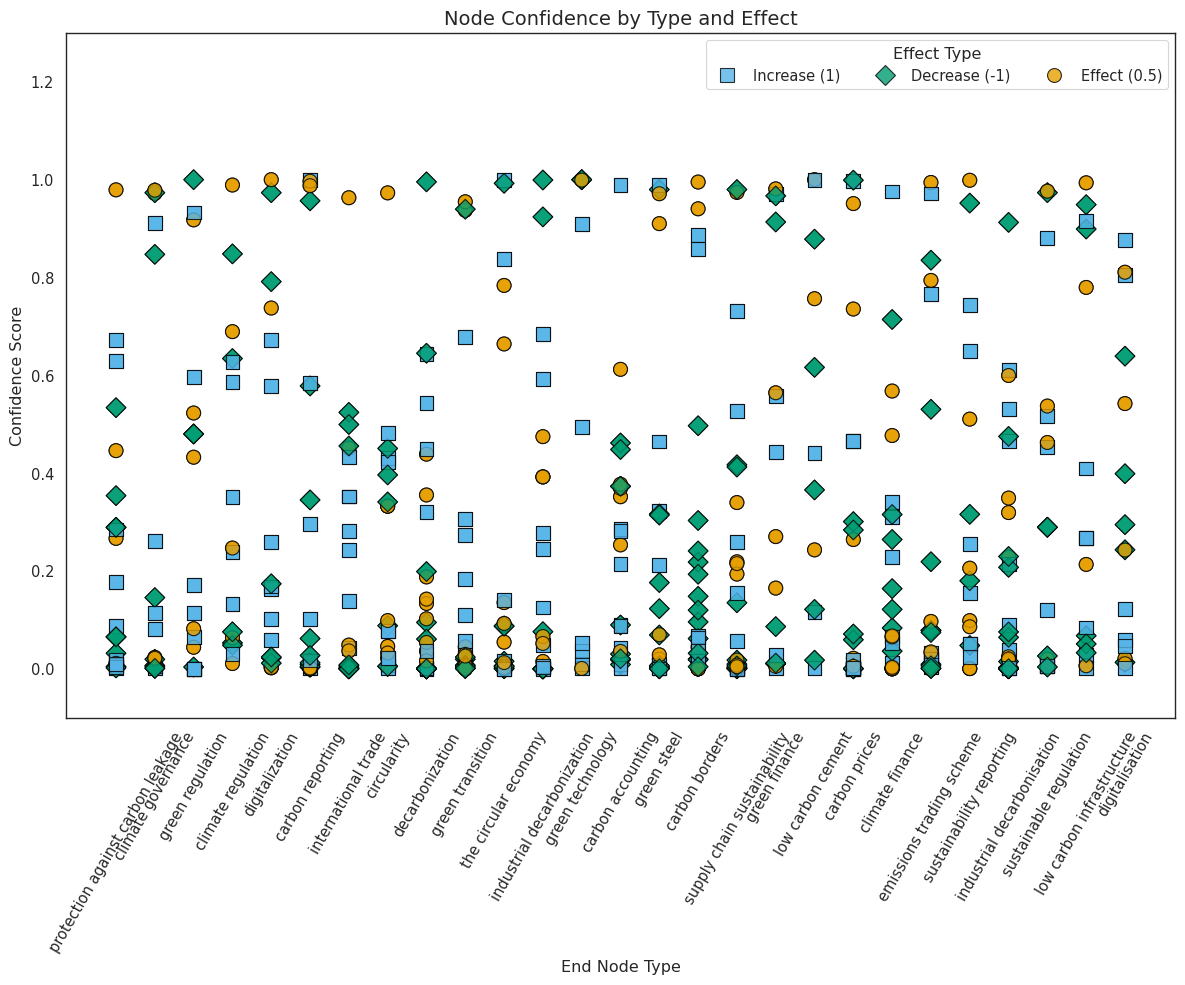

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Add a new column to identify whether it's a cause or effect node
df_plot = df_no_duplicates.copy()
df_plot['node_type'] = 'cause'

# Optional: if you want both cause & effect points
# Add rows for effect nodes as well (confidence duplicated for now)
df_effects = df_plot.copy()
df_effects['cause'] = df_effects['effect']
df_effects['node_type'] = 'effect'
df_plot = pd.concat([df_plot, df_effects])

# Set up color palette (colorblind-friendly: Color Universal Design palette)
weight_color_map = {
    1.0: '#E69F00',   # Orange (increase)
    -1.0: '#56B4E9',  # Blue (decrease)
    0.5: '#009E73'    # Green (neutral/effect)
}
df_plot['weight_color'] = df_plot['weight'].map(weight_color_map)

# Plot
plt.figure(figsize=(12, 10))
sns.set(style="white", context="paper", font_scale=1.2)

scatter = sns.scatterplot(
    data=df_plot,
    x="effect",
    y="confidence",
    hue="weight",
    palette=weight_color_map,
    style="weight",
    markers={1.0: "o", -1.0: "s", 0.5: "D"},
    edgecolor="black",
    s=100,
    alpha=0.8,
)

# Legend formatting
handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    title="Effect Type",
    handles=handles,
    labels=["Increase (1)", "Decrease (-1)", "Effect (0.5)"],
    loc='upper right',
    #bbox_to_anchor=(1.00, 0.98),
    ncol=3,
    frameon=True
)

# Axis labels and title
plt.xlabel("End Node Type")
plt.ylabel("Confidence Score")
plt.title("Node Confidence by Type and Effect", fontsize=14)

# Final tweaks
plt.ylim(-0.1, 1.3)
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig("depth1_node_confidence_plot.png")
plt.show()

In [ ]:
# filter out rows below confidence threshold derived from filter graph and also 1.0
print(df_no_duplicates.info())
print(df_no_duplicates.head(20))

print(df_no_duplicates['confidence'].dtype)
print(df_no_duplicates['confidence'].unique())

# Filter by column value using loc
df_filtered = df_no_duplicates.loc[(df_no_duplicates['confidence'] >= 0.1) & (df_no_duplicates['confidence'] < 1.0)]
print(df_filtered.info())
#df_filtered.head(21)

In [ ]:
df_filtered.to_csv('all_finalized_topics.csv', index=False)

from google.colab import files

# Download files locally
files.download('all_finalized_topics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4.6 Extract concept list

These concepts will be plugged into the QA model and it will be run again. The concepts will be re-worded to ensure semantic integrity.

In [ ]:
# print filtered list of concept (to be inputted into depth 2 QA model)
print(df_filtered['cause'].unique())

# 5. DEPTH 2: Extracted Concept Layers + Original Levers

Before running this both the concepts and questions were edited for semantic clarity and interperability.

## 5.1 Run Depth 2 QA Model

### 5.1.1 Depth 2 Topics

In [ ]:
# Load your QA model
qa = SimpleQA(INDEXDIR)  # load QA model

# Define where answers will be stored
twodepth_increase_answer_list = []
twodepth_effects_answer_list = []
twodepth_decrease_answer_list = []

final_cbam = [
    "access to low-carbon energy sources",
    "adoption of clean technology",
    "alternative fuel penetration",
    "availability of critical raw materials",
    "blockchain technology",
    "carbon abatement contracts",
    "carbon capture technology",
    "carbon leakage",
    "carbon pricing disparities",
    "carbon pricing policy",
    "carbon-intensive industry",
    "carbon-intensive product competitiveness",
    "CBAM coverage of exports",
    "CBAM implementation challenges",
    "CBAM revenue streams",
    "CBAM sector coverage",
    "CBAM's negative impact on developing countries",
    "circular economy legislation",
    "circular supply chains",
    "climate research",
    "corporate responsibility",
    "decarbonization of global supply chains",
    "decline in demand for European steel",
    "declining greenhouse gas emissions",
    "delay in CBAM implementation",
    "difficult investment climate",
    "digital infrastructure",
    "digital product passport",
    "digital technology uptake",
    "disruption from the green transition",
    "diverse low-carbon technology mix",
    "ecodesign requirements",
    "economic downturn",
    "electrification of industry",
    "emissions cap",
    "emissions shifting",
    "EU CBAM",
    "EU climate ambition",
    "EU climate policy",
    "EU ETS reforms",
    "EU industrial competitiveness",
    "EU production standards",
    "EU steel sector",
    "extensions of the ETS",
    "fossil fuel phase-out",
    "geopolitical tensions",
    "global CBAM adoption",
    "global climate ambition",
    "global climate mitigation",
    "global supply chain complexity",
    "halted green investments",
    "harmonized carbon pricing",
    "high carbon costs",
    "high carbon price",
    "high energy costs",
    "high energy prices",
    "hydrogen adoption",
    "hydrogen-based electrification",
    "inclusion of all consumer waste streams in circular economy policies",
    "inclusion of downstream products under CBAM",
    "increasing demand for steel",
    "industrial decarbonisation",
    "industrial delocalisation",
    "industrial slowdown",
    "insufficient decarbonization investments",
    "insufficient trade safeguards",
    "international climate cooperation",
    "international trade",
    "introduction of the EU CBAM",
    "low sustainability-driven demand",
    "macroeconomic conditions",
    "narrow carbon accounting focus",
    "negative market responses to CBAM",
    "net-zero targets",
    "phase-out of free allowances",
    "policy-induced inflation",
    "poor alignment of reporting requirements with sustainability performance",
    "priortization of sustainable practices",
    "product carbon footprint",
    "raw material costs",
    "recycling technology",
    "reduced economic activity",
    "regional climate solutions",
    "regulatory certainty",
    "regulatory harmonization",
    "regulatory pressure",
    "regulatory simplification",
    "regulatory uncertainty",
    "removal of existing carbon protection",
    "renewable based electrification",
    "renewable energy adoption",
    "renewable energy capacity",
    "renewable energy certificates",
    "resource shuffling",
    "streamlined European Sustainability Reporting Standards",
    "structural supply changes",
    "supplier misalignment",
    "supply chain demands",
    "supply chain traceability",
    "sustainability-driven consumer demand",
    "sustainable refractory production",
    "systematic default value for CBAM",
    "technological issues",
    "the cost of carbon"
]


counter = 0
for k in final_cbam:
    print(k)
    try:
        twodepth_increase_answer_list.append( {
            'cause': qa.ask('What causes ' + k + ' to increase?'),
            'effect': k
        })

        twodepth_increase_answer_list.append( {
            'cause': qa.ask('What improves ' + k + '?'),
            'effect': k
        })
        twodepth_decrease_answer_list.append( {
            'cause': qa.ask('What causes ' + k + ' to decrease?'),
            'effect': k
        })

        twodepth_decrease_answer_list.append( {
            'cause': qa.ask('What adversely affects ' + k + '?'),
            'effect': k
        })

        twodepth_effects_answer_list.append( {
            'cause': qa.ask('What are the effects of' + k + '?'), # changed from what effects
            'effect': k
        })

        twodepth_effects_answer_list.append( {
            'cause': qa.ask('What affects ' + k + '?'),
            'effect': k
        })

    except Exception as e:
        print("ERR: ")
        print(e)
    #if counter > 3:
    #    break
    counter += 1

## 5.2 Save Depth 2 Results

In [ ]:
import pandas as pd

# After the QA loop:
twodepth_df_increase = pd.DataFrame(twodepth_increase_answer_list)
twodepth_df_effects = pd.DataFrame(twodepth_effects_answer_list)
twodepth_df_decrease = pd.DataFrame(twodepth_decrease_answer_list)

twodepth_df_increase.to_csv('stakeholder_depth2_increase_answers.csv', index=False)
twodepth_df_effects.to_csv('stakeholder_depth2_effects_answers.csv', index=False)
twodepth_df_decrease.to_csv('stakeholder_depth2_decrease_answers.csv', index=False)

from google.colab import files

# Download files locally (colab does not save)
files.download('stakeholder_depth2_increase_answers.csv')
files.download('stakeholder_depth2_effects_answers.csv')
files.download('stakeholder_depth2_decrease_answers.csv')

## 5.3 Sanity Check

In [ ]:
print("------------------------------------------------------------")
print("Increase answer list")
print("------------------------------------------------------------")
for i in twodepth_increase_answer_list:
    print("***** effect: " + i["effect"])
    for c in i["cause"]:
        print("answer: " + c["answer"])
        print("confidence: " + str(c["confidence"]))
        print("similarity_score: " + str(c["similarity_score"]))
        print("reference: " + c["reference"])
        print("sentence_beginning: " + c["sentence_beginning"])
        print("sentence_end: " + c["sentence_end"])
        print("full_answer: " + c["full_answer"])
        print("-------------")
#print(increase_answer_list)
print("------------------------------------------------------------")
print("Decrease answer list")
print("------------------------------------------------------------")
#print(decrease_answer_list)
for i in twodepth_decrease_answer_list:
    print("***** effect: " + i["effect"])
    for c in i["cause"]:
        print("answer: " + c["answer"])
        print("confidence: " + str(c["confidence"]))
        print("similarity_score: " + str(c["similarity_score"]))
        print("reference: " + c["reference"])
        print("sentence_beginning: " + c["sentence_beginning"])
        print("sentence_end: " + c["sentence_end"])
        print("full_answer: " + c["full_answer"])
        print("-------------")

print("------------------------------------------------------------")
print("Effects answer list")
print("------------------------------------------------------------")
#print(effects_answer_list)
for i in twodepth_effects_answer_list:
    print("***** effect: " + i["effect"])
    for c in i["cause"]:
        print("answer: " + c["answer"])
        print("confidence: " + str(c["confidence"]))
        print("similarity_score: " + str(c["similarity_score"]))
        print("reference: " + c["reference"])
        print("sentence_beginning: " + c["sentence_beginning"])
        print("sentence_end: " + c["sentence_end"])
        print("full_answer: " + c["full_answer"])
        print("-------------")

------------------------------------------------------------
Increase answer list
------------------------------------------------------------
***** effect: access to low-carbon energy sources
answer: an abundant resource of clean electricity
confidence: 0.48993814
similarity_score: 0.8211721777915955
reference: 140
sentence_beginning:  the uk has 
sentence_end:  that can help reduce energy bills and make products manufactured here some of the lowest carbon goods in the world.
full_answer: the uk has an abundant resource of clean electricity that can help reduce energy bills and make products manufactured here some of the lowest carbon goods in the world.
-------------
answer: energy renewable energy directive
confidence: 0.48993814
similarity_score: 0.7680087685585022
reference: 1417
sentence_beginning:  to this end, we highlight in this paper a number of recommendations focusing on the following legislative files : effort sharing regulation (esr) : avoiding a transfer of responsibili

## 5.4 Create cause-effect dataframe

### 5.4.1 Single Run

In [ ]:
from operator import itemgetter
from keybert import KeyBERT
from operator import itemgetter
import pandas as pd

# IF GOING DIRECTLY FROM THE MODEL OUTPUT
def build_cause_effect_df(df_cause_effect, answer_list, effect_type):
    for i in answer_list:
        for c in i["cause"]:

            keywords = kw_model.extract_keywords(c["answer"], keyphrase_ngram_range=(1, 1),
                                                 stop_words='english',
                                                 top_n=5,
                                                 use_mmr=True,
                                                 diversity=0.7)
            keywords_bigrams = kw_model.extract_keywords(c["answer"], keyphrase_ngram_range=(1, 2),
                                                         stop_words='english',
                                                         top_n=5,
                                                         use_mmr=True,
                                                         diversity=0.7)
            keywords_trigrams = kw_model.extract_keywords(c["answer"], keyphrase_ngram_range=(1, 3),
                                                          stop_words='english',
                                                          top_n=5,
                                                          use_mmr=True,
                                                          diversity=0.7)

            all_keywords = []
            if keywords:
                all_keywords += keywords
            if keywords_bigrams:
                all_keywords += keywords_bigrams
            if keywords_trigrams:
                all_keywords += keywords_trigrams

            # manually assign the weights
            weight = 0
            if effect_type == "increase":
                weight = 1
            elif effect_type == "decrease":
                weight = -1
            else:
                weight = 0.5


            top_k = c["answer"]
            top_k_val = 0
            if(len(all_keywords) > 0):
                top_k = max(all_keywords, key = itemgetter(1))[0]
                top_k_val = max(all_keywords, key = itemgetter(1))[1]

            #print("Cause: " + top_k + ", Effect: " + i["effect"] + ", Original : " + c["answer"] + ", Confidence: " + str(c["confidence"]) + ", k_num: " + str(top_k_val))
            #print("------------------------------")
            # add to dataframe if confidence is over 0.1
            if c["confidence"] > .1:
              df_cause_effect.loc[len(df_cause_effect.index)] = [top_k, i["effect"], effect_type, c["confidence"], top_k_val, all_keywords, c["similarity_score"], weight, c["full_answer"]]

            # add all answers to df (regardless of confidence)
            #df_cause_effect.loc[len(df_cause_effect.index)] = [top_k, i["effect"], effect_type, c["confidence"], top_k_val, all_keywords, c["similarity_score"], weight, c["full_answer"]]

    return df_cause_effect

In [ ]:
twodepth_df_cause_effect = pd.DataFrame(columns=['cause', 'effect', 'effect_type', 'confidence', 'top_keyword_score', 'keywords', 'similarity_score', 'weight', 'full_answer'])
kw_model = KeyBERT()

effect_type = ""

twodepth_df_cause_effect = build_cause_effect_df(twodepth_df_cause_effect, twodepth_increase_answer_list, "increase")
twodepth_df_cause_effect = build_cause_effect_df(twodepth_df_cause_effect, twodepth_decrease_answer_list, "decrease")
twodepth_df_cause_effect = build_cause_effect_df(twodepth_df_cause_effect, twodepth_effects_answer_list, "effect")


print(twodepth_df_cause_effect.info())
twodepth_df_cause_effect.head(30)

### 5.4.2 From CSV

In [ ]:
# prompt:  re-read in decrease, increase, effect answer lists (if model output already saved)

import pandas as pd
from google.colab import files

# Load the CSV files into pandas DataFrames
try:
    two_df_increase = pd.read_csv('stakeholder_depth2_increase_answers.csv')
    two_df_decrease = pd.read_csv('stakeholder_depth2_decrease_answers.csv')
    two_df_effects = pd.read_csv('stakeholder_depth2_effects_answers.csv')
    print("Files loaded successfully.")
except FileNotFoundError:
    print("Error: One or more CSV files not found. Please ensure they are in the current directory or provide the correct paths.")
    # Handle the error appropriately, e.g., exit the script or try alternative loading methods
    exit()

print("\nIncrease DataFrame:")
print(two_df_increase.head())

print("\nDecrease DataFrame:")
print(two_df_decrease.head())

print("\nEffects DataFrame:")
print(two_df_effects.head())

Files loaded successfully.

Increase DataFrame:
                                               cause  \
0  [{'answer': 'increasing international climate ...   
1  [{'answer': 'renewable based electrification',...   
2  [{'answer': 'to low carbon prices and free all...   
3  [{'answer': 'renewable based electrification',...   
4  [{'answer': 'regulation lacks the proper safeg...   

                       effect  
0  industrial decarbonization  
1  industrial decarbonization  
2  industrial decarbonisation  
3  industrial decarbonisation  
4            green regulation  

Decrease DataFrame:
                                               cause  \
0  [{'answer': 'to a crease in industrial activit...   
1  [{'answer': 'affects european competition', 'c...   
2  [{'answer': 'to a crease in industrial activit...   
3  [{'answer': 'affects european competition', 'c...   
4  [{'answer': 'carbon leakage', 'confidence': np...   

                       effect  
0  industrial decarbonization  
1

In [ ]:
import pandas as pd
import numpy as np
from keybert import KeyBERT
from operator import itemgetter

# Initialize KeyBERT
kw_model = KeyBERT()

# Initialize the cause_effect dataframe
twodepth_df_cause_effect = pd.DataFrame(columns=['cause', 'effect', 'effect_type', 'confidence', 'top_keyword_score', 'keywords', 'similarity_score', 'weight', 'full_answer'])


def build_cause_effect_df_from_df(df_cause_effect, df_input, effect_type):
    """
    Builds the cause_effect DataFrame from the input DataFrame.

    Args:
        df_cause_effect: The DataFrame to store cause-effect relationships.
        df_input: The input DataFrame containing 'cause' and 'effect' columns.
        effect_type: The type of effect ("increase", "decrease", "effect").

    Returns:
        The updated df_cause_effect DataFrame.
    """
    for index, row in df_input.iterrows():
        # Convert 'cause' column to a list; handle empty or non-list values
        try:
            cause_data_list = eval(row['cause'])
            # Ensure cause_data_list is a list and not empty before accessing elements
            if isinstance(cause_data_list, list) and cause_data_list:
                cause_data = cause_data_list[0]
            else:
                # Handle cases where 'cause' is empty or not a list
                print(f"Skipping row {index} in {df_input} due to invalid 'cause' data: {row['cause']}")
                continue
        except (SyntaxError, NameError) as e:
            # Handle cases where eval fails (e.g., invalid string format)
            print(f"Skipping row {index} due to eval error: {e}, cause data: {row['cause']}")
            continue

        # Extract keywords using KeyBERT
        keywords = kw_model.extract_keywords(cause_data["answer"], keyphrase_ngram_range=(1, 1), stop_words='english', top_n=5, use_mmr=True, diversity=0.7)
        keywords_bigrams = kw_model.extract_keywords(cause_data["answer"], keyphrase_ngram_range=(1, 2), stop_words='english', top_n=5, use_mmr=True, diversity=0.7)
        keywords_trigrams = kw_model.extract_keywords(cause_data["answer"], keyphrase_ngram_range=(1, 3), stop_words='english', top_n=5, use_mmr=True, diversity=0.7)

        all_keywords = keywords + keywords_bigrams + keywords_trigrams

        # Assign weight based on effect_type
        weight = 1 if effect_type == "increase" else -1 if effect_type == "decrease" else 0.5

        # Select top keyword and its score
        top_k = cause_data["answer"]
        top_k_val = 0
        if all_keywords:
            top_k = max(all_keywords, key=itemgetter(1))[0]
            top_k_val = max(all_keywords, key=itemgetter(1))[1]

        # Get similarity_score (or assign 0 if not available)
        similarity_score = cause_data.get("similarity_score", 0)

        # Append to DataFrame if confidence is above threshold
        if cause_data["confidence"] > .1:
            df_cause_effect.loc[len(df_cause_effect.index)] = [top_k, row['effect'], effect_type, cause_data["confidence"], top_k_val, all_keywords, similarity_score, weight, cause_data["answer"]]

    return df_cause_effect

In [ ]:
# Populate the DataFrame
twodepth_df_cause_effect = build_cause_effect_df_from_df(twodepth_df_cause_effect, two_df_increase, "increase")
twodepth_df_cause_effect = build_cause_effect_df_from_df(twodepth_df_cause_effect, two_df_decrease, "decrease")
twodepth_df_cause_effect = build_cause_effect_df_from_df(twodepth_df_cause_effect, two_df_effects, "effect")

Skipping row 71 in                                                 cause  \
0   [{'answer': 'increasing international climate ...   
1   [{'answer': 'renewable based electrification',...   
2   [{'answer': 'to low carbon prices and free all...   
3   [{'answer': 'renewable based electrification',...   
4   [{'answer': 'regulation lacks the proper safeg...   
..                                                ...   
80  [{'answer': 'after european commission chief u...   
81  [{'answer': 'its ambitions', 'confidence': np....   
82  [{'answer': 'or require existing trading partn...   
83  [{'answer': 'that carbon tax', 'confidence': n...   
84  [{'answer': 'that carbon tax', 'confidence': n...   

                        effect  
0   industrial decarbonization  
1   industrial decarbonization  
2   industrial decarbonisation  
3   industrial decarbonisation  
4             green regulation  
..                         ...  
80  evolving climate tax rules  
81         EU trading partners  

### 5.4.3 Save inital cause-effect dataframe

In [ ]:
twodepth_df_cause_effect.to_csv('all_depth2_cause_effect.csv', index=False)

from google.colab import files

# Download files locally
files.download('all_depth2_cause_effect.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5.5 Clean cause-effect dataframe

In [ ]:
# EXPLORE THE DOUBLE RESULTS
conflict_counts = twodepth_df_cause_effect.groupby(['cause', 'effect'])['effect_type'].nunique().reset_index()
conflicts = conflict_counts[conflict_counts['effect_type'] > 1]

# Get rows that are in conflict
conflict_pairs = pd.merge(twodepth_df_cause_effect, conflicts, on=['cause', 'effect'])
print(conflict_pairs)

In [ ]:
# STEP 1: AGGREGATE NET INFLUENCE
effect_map = {'increase': 1, 'decrease': -1, 'effect': 0}
twodepth_df_cause_effect['direction'] = twodepth_df_cause_effect['effect_type'].map(effect_map)
twodepth_df_cause_effect['net_effect'] = twodepth_df_cause_effect['direction'] * twodepth_df_cause_effect['confidence'] * twodepth_df_cause_effect['weight']

twodepth_df_net = twodepth_df_cause_effect.groupby(['cause', 'effect']).agg({
    'net_effect': 'sum',
    'confidence': 'mean',
    'weight': 'mean'
}).reset_index()

# STEP 2: KEEP HIGHEST CONFIDENCE IF CAUSE APPEARS MULTIPLE TIMES SAME EFFECT
# Sort so highest confidence is at the top — will be dropped in the next step
twodepth_df_sorted = twodepth_df_cause_effect.sort_values(['cause', 'effect', 'weight', 'confidence'], ascending=[True, True, True, False])

# Drop duplicates, keeping the *first* (highest confidence) for each group
twodepth_df_no_duplicates = twodepth_df_sorted.drop_duplicates(subset=['cause', 'effect', 'weight'], keep='first')

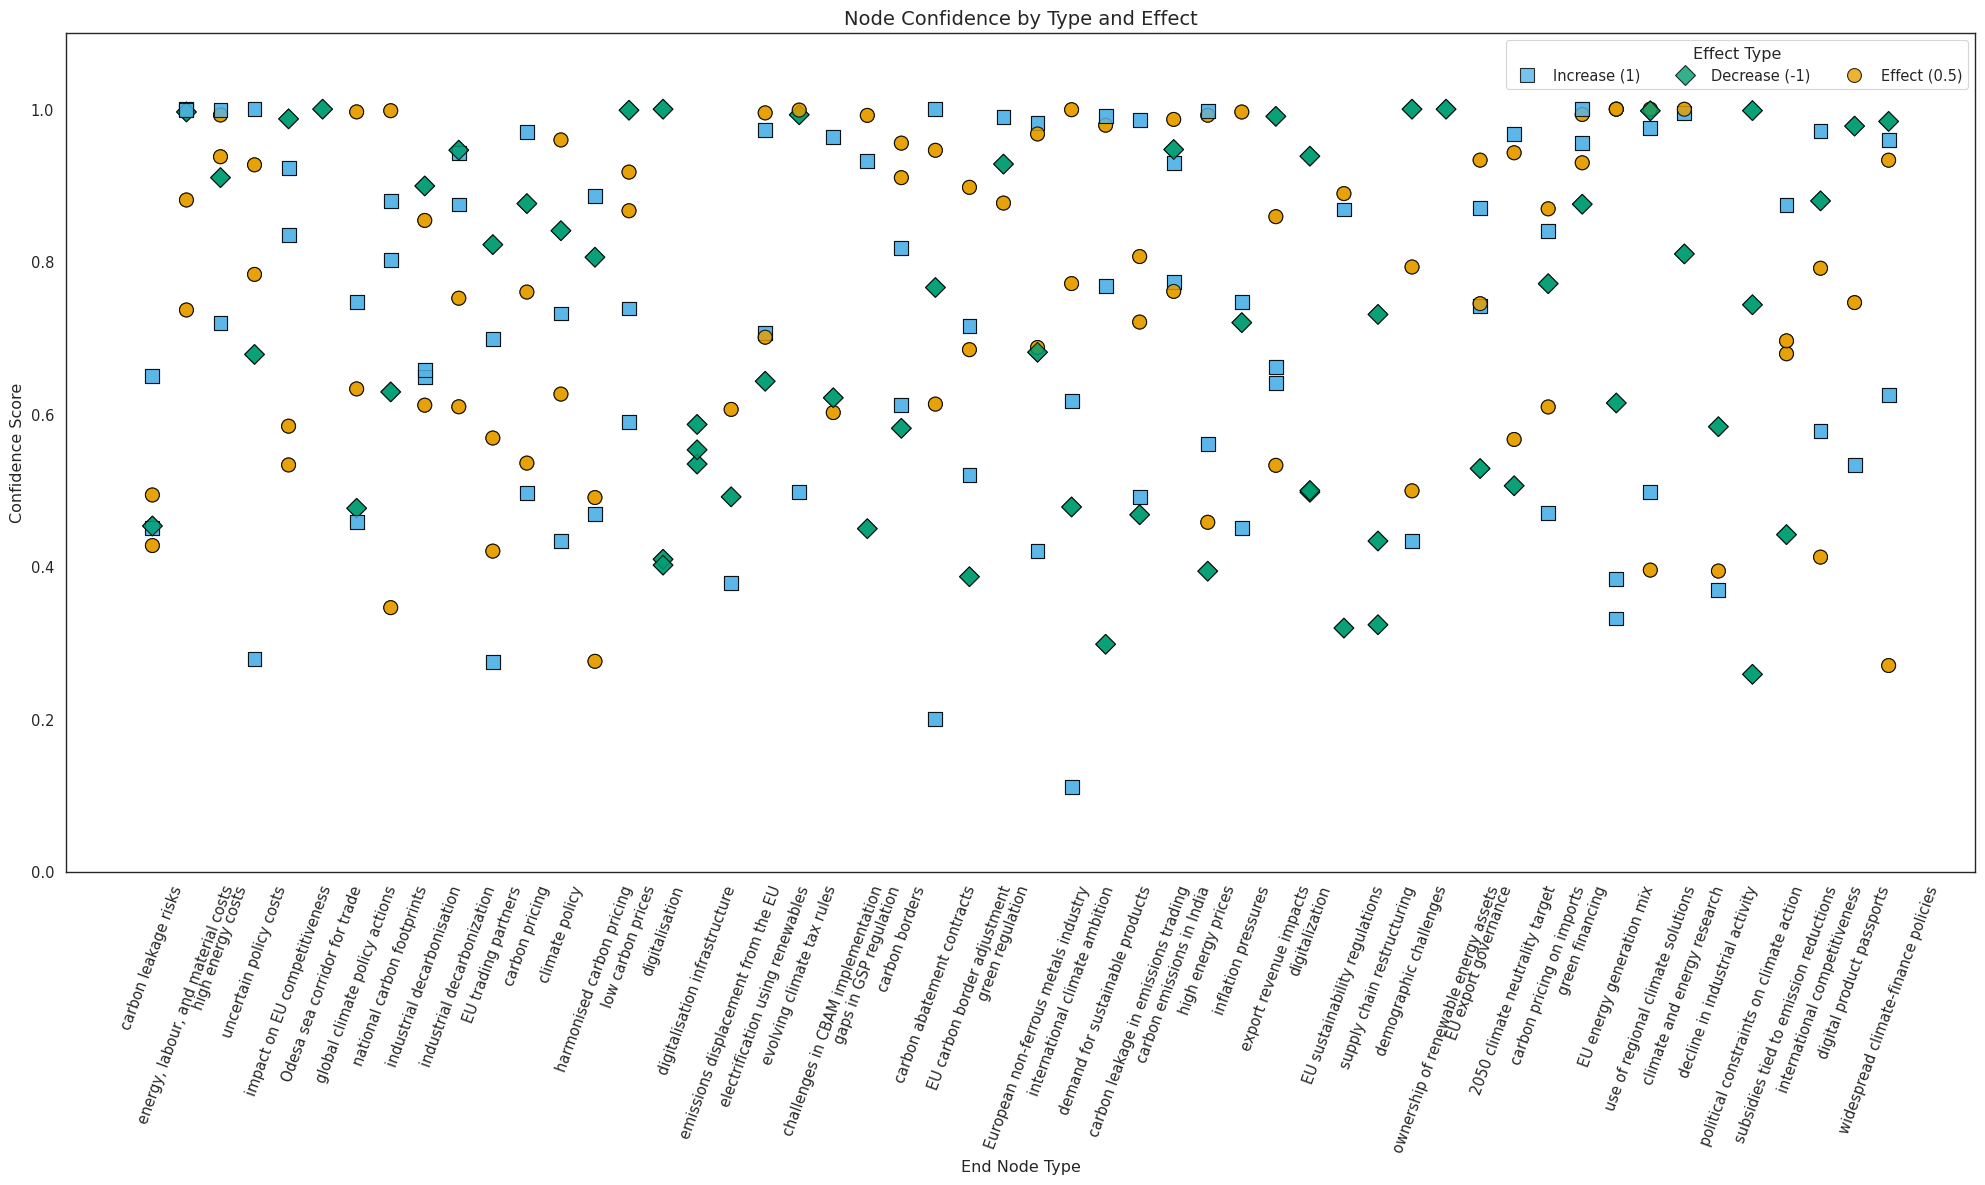

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Add a new column to identify whether it's a cause or effect node
twodepth_df_plot = twodepth_df_no_duplicates.copy()
twodepth_df_plot['node_type'] = 'cause'

# Optional: if you want both cause & effect points
# Add rows for effect nodes as well (confidence duplicated for now)
twodepth_df_effects = twodepth_df_plot.copy()
twodepth_df_effects['cause'] = twodepth_df_effects['effect']
twodepth_df_effects['node_type'] = 'effect'
twodepth_df_plot = pd.concat([twodepth_df_plot, twodepth_df_effects])

# Set up color palette (colorblind-friendly: Color Universal Design palette)
twodepth_weight_color_map = {
    1.0: '#E69F00',   # Orange (increase)
    -1.0: '#56B4E9',  # Blue (decrease)
    0.5: '#009E73'    # Green (neutral/effect)
}
twodepth_df_plot['weight_color'] = twodepth_df_plot['weight'].map(twodepth_weight_color_map)

# Plot
plt.figure(figsize=(20, 12))
sns.set(style="white", context="paper", font_scale=1.2)

scatter = sns.scatterplot(
    data=twodepth_df_plot,
    x="effect",
    y="confidence",
    hue="weight",
    palette=twodepth_weight_color_map,
    style="weight",
    markers={1.0: "o", -1.0: "s", 0.5: "D"},
    edgecolor="black",
    s=100,
    alpha=0.8,
)

# Legend formatting
handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    title="Effect Type",
    handles=handles,
    labels=["Increase (1)", "Decrease (-1)", "Effect (0.5)"],
    loc='upper right',
    #bbox_to_anchor=(1.00, 0.98),
    ncol=3,
    frameon=True
)

# Axis labels and title
plt.xlabel("End Node Type")
plt.xticks(rotation=70)
plt.ylabel("Confidence Score")
plt.title("Node Confidence by Type and Effect", fontsize=14)

# Final tweaks
plt.ylim(0.0, 1.1)
plt.tight_layout()
#plt.savefig("depth2_node_confidence_plot.png")
plt.show()

In [ ]:
# filter out rows below confidence threshold derived from filter graph and also 1.0
print(twodepth_df_no_duplicates.info())
#print(twodepth_df_no_duplicates.head(20))

print(twodepth_df_no_duplicates['confidence'].dtype)
print(twodepth_df_no_duplicates['confidence'].unique())

# Filter by column value using loc
twodepth_df_filtered = twodepth_df_no_duplicates.loc[(twodepth_df_no_duplicates['confidence'] >= 0.40)] #& (twodepth_df_no_duplicates['confidence'] < 1.0)]
print(twodepth_df_filtered.info())
twodepth_df_filtered.head(21)

### 5.5.2 Save cleaned protrayed cause-effect dataframe

In [ ]:
twodepth_df_no_duplicates.to_csv('depth2_cause_effect.csv', index=False)

from google.colab import files

# Download files locally
files.download('depth2_cause_effect.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# print filtered list of concept (to be inputted into depth 2 QA model)
print(twodepth_df_filtered['cause'].unique())